In [1]:
!pip install torch

In [2]:
import torch

In [3]:
from IPython.display import Image

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [5]:
%cd yolov5

C:\Users\bertu\YOLOv5_License_Plate_Detection\yolov5


In [6]:
!more "C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\custom_data.yaml"

train: C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images\train
val: C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images\val

nc: 1
names: ['license-plate']


In [7]:
!pip install -r requirements.txt

In [8]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = r'C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images\train'
valPath = r'C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images\val'
crsPath = r'C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  80
Validation images are :  20


In [9]:
data_file = r'C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\custom_data.yaml'
yolov5m_file = r"C:/Users/bertu/YOLOv5_License_Plate_Detection/yolov5/models/yolov5m.yaml"

In [10]:
!more "C:/Users/bertu/YOLOv5_License_Plate_Detection/yolov5/models/yolov5m.yaml"

# YOLOv5 ðŸš€ by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.67  # model depth multiple
width_multiple: 0.75  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [

In [11]:
# define number of classes based on YAML
import yaml
with open(data_file, 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])
    print(num_classes)

1


In [12]:
with open(yolov5m_file, "r") as stream:
    try:
        print(yaml.safe_load(stream))
    except yaml.YAMLError as exc:
        print(exc)

{'nc': 80, 'depth_multiple': 0.67, 'width_multiple': 0.75, 'anchors': [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], 'backbone': [[-1, 1, 'Conv', [64, 6, 2, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C3', [128]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C3', [256]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 9, 'C3', [512]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C3', [1024]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'Conv', [512, 1, 1]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C3', [512, False]], [-1, 1, 'Conv', [256, 1, 1]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C3', [256, False]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 14], 1, 'Concat', [1]], [-1, 3, 'C3', [512, False]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 10], 1, 'Concat', [1]], [-1, 3, 'C3', [1024, False]], [[17, 20, 23], 1, 'Detect', ['nc', 'anchors']]]}


In [13]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [15]:
%%time
%cd yolov5
!python train.py --img 416 --batch 16 --epochs 100 --data "C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\custom_data.yaml" --cfg ./models/yolov5m.yaml --weights '' --name yolov5m_results  --cache

[WinError 2] The system cannot find the file specified: 'yolov5'
C:\Users\bertu\YOLOv5_License_Plate_Detection\yolov5
CPU times: total: 31.2 ms
Wall time: 3min 23s


train: weights='', cfg=./models/yolov5m.yaml, data=C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\custom_data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.2-196-ge42c89d Python-3.9.12 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, 

      49/99      3.13G    0.07919    0.03094          0         60        416:  60%|######    | 3/5 [00:00<00:00,  7.09it/s]
      49/99      3.13G    0.07919    0.03094          0         60        416:  80%|########  | 4/5 [00:00<00:00,  7.34it/s]
      49/99      3.13G    0.07942    0.03255          0         28        416:  80%|########  | 4/5 [00:00<00:00,  7.34it/s]
      49/99      3.13G    0.07942    0.03255          0         28        416: 100%|##########| 5/5 [00:00<00:00,  8.21it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]
                   all         20         21      0.198      0.286      0.157     0.0523

      Epo

In [16]:
%load_ext tensorboard
%tensorboard --logdir runs

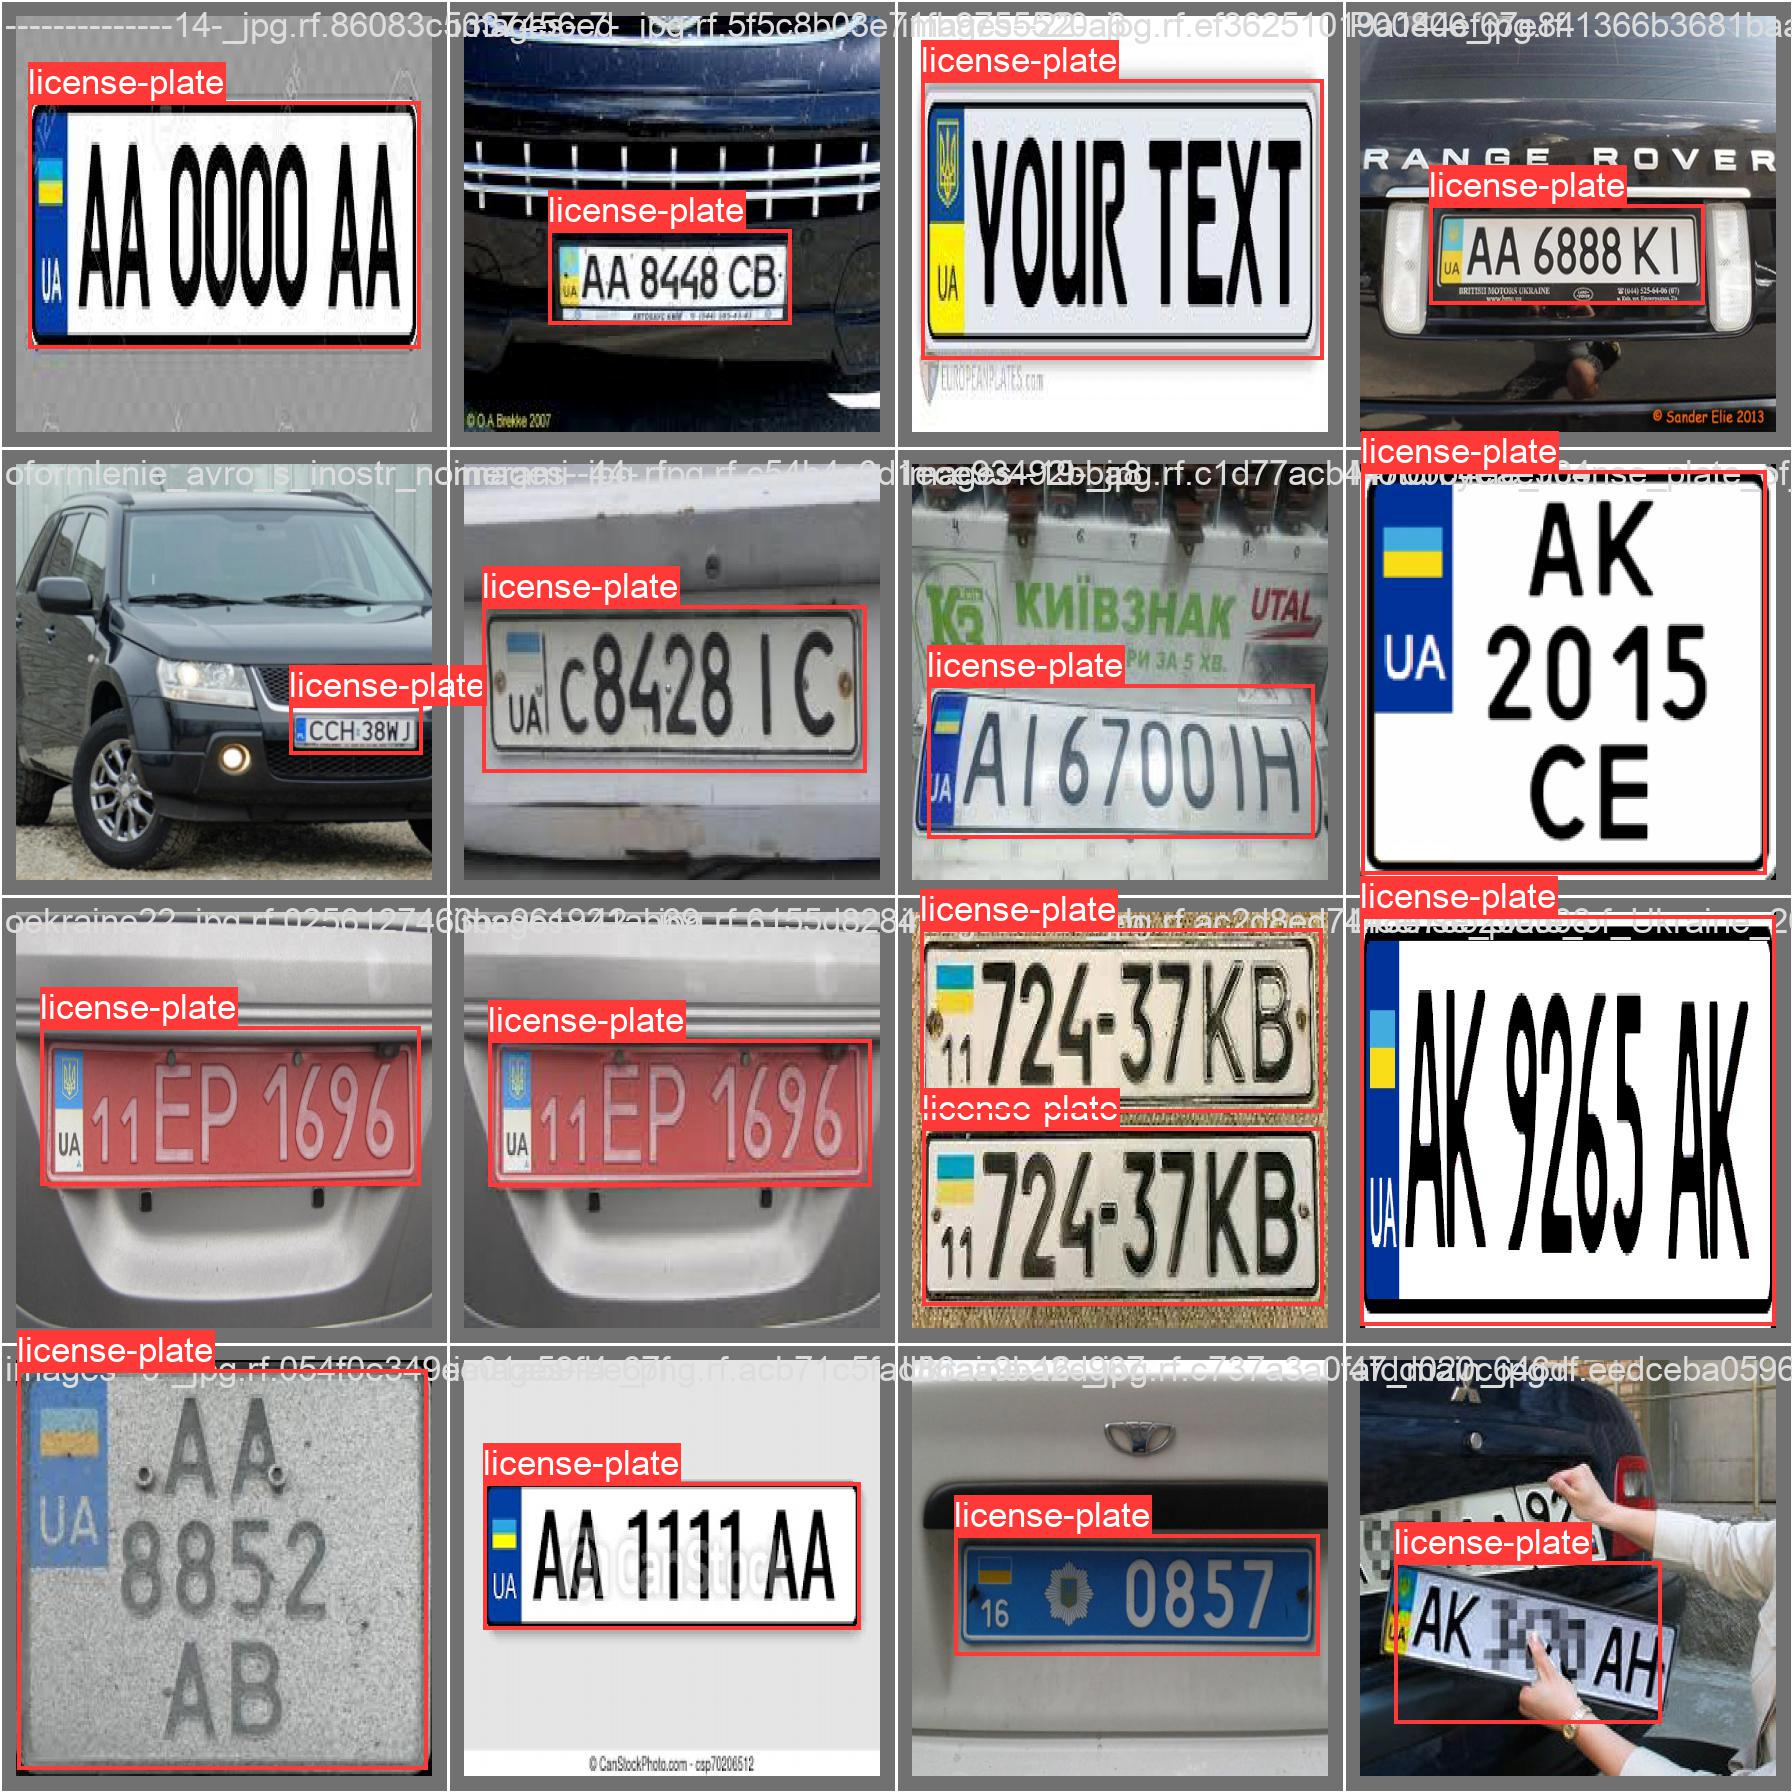

In [17]:
Image(filename=r'C:\Users\bertu\YOLOv5_License_Plate_Detection\yolov5\runs\train\yolov5m_results2\val_batch0_labels.jpg', width=1000)

In [18]:
!python detect.py --source C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images\test\ua_aa8448cb_jpg.rf.4b91c950382dcd629f11bd4d02eb93e2.jpg --weights C:\Users\bertu\YOLOv5_License_Plate_Detection\yolov5\runs\train\yolov5m_results2\weights\best.pt

detect: weights=['C:\\Users\\bertu\\YOLOv5_License_Plate_Detection\\yolov5\\runs\\train\\yolov5m_results2\\weights\\best.pt'], source=C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images\test\ua_aa8448cb_jpg.rf.4b91c950382dcd629f11bd4d02eb93e2.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-196-ge42c89d Python-3.9.12 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 C:\Users\bertu\YOLOv5_License_Plate_Detection\Dataset\images\test\ua_aa8448cb_jpg.rf.4b91c950382dcd629f11bd4d02eb93e2.jpg: 640x640 2